### Initial data exploration

This notebook covers initial data exploration of different data sources.

### Libraries

In [62]:
import geopandas as gpd
from shapely.geometry import Point#, LineString, Polygon
import networkx as nx
import osmnx as ox
import folium
import matplotlib.pyplot as plt
# from descartes import PolygonPatch
# from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)

### Distance from GIS (driving)

Isochrone (Travel time map) for walking distance to GIS. Distance is set to with 3,333 m or approximately a 45 minute walk.

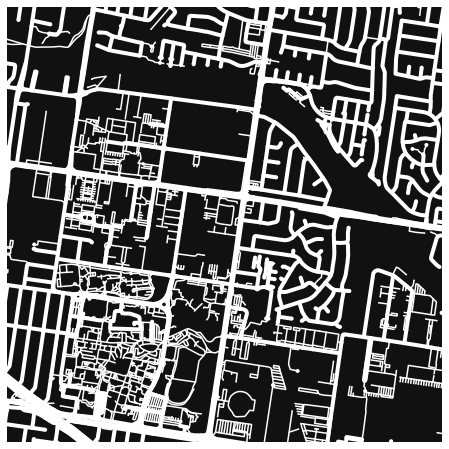

In [58]:
# Set variables and graph streets from address
place = "541 Blackburn Rd, Mount Waverley VIC 3149"
mode = "walk"
dist = 3333 # Note this is in metres
G = ox.graph_from_address(place, dist=dist, dist_type="network", simplify=True, network_type=mode)
# graph_map = ox.plot_graph_folium(G)

# Show nearby streets as proof of concept
ox.plot_figure_ground(G,dist=1500);

In [30]:
# Get gdf from graph and create bounding polygon
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
node_points = [Point((x, y)) for x, y in zip(gdf_nodes['x'],gdf_nodes['y'])]
bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull


# add polygon to folium map centred on GIS
m = folium.Map(location=ox.geocode("541 Blackburn Rd, Mount Waverley VIC 3149"), zoom_start=14, tiles='CartoDB positron')
json_poly = folium.GeoJson(data=bounding_poly, style_function=lambda x: {'fillColor': 'orange'})
json_poly.add_to(m)

# Output map with 45 min walking distance polygon
m


Thus a function for defining isodistances polygon is given below:

In [44]:
def isodistance_poly(place:str, dist:int=1000,mode:str="walk") -> folium.folium.Map:
    '''Create a map from OSM with a polygon covering all routes within some distance of some address.
    Leverages osmnx.graph_from_address function; see help on this function for more information. 
    
    Parameters
    ----------
    place : string
        the address to geocode and use as the central point around which to
        construct the map
    dist : int
        max distance from central point nodes will be collected
    mode : string {"all_private", "all", "bike", "drive", "drive_service", "walk"}
        what type of street network to get

    Returns
    ----------
    folium.folium.Map    

    Notes
    -----
    osmnx, geopandas and folium must be installed.
    
    You can configure the Overpass server timeout, memory allocation, and
    other custom settings via ox.config().
    '''
    
    G = ox.graph_from_address(place, dist=dist, dist_type="network", simplify=True, network_type=mode)
    gdf_nodes = ox.graph_to_gdfs(G, edges=False)
    node_points = [Point((x, y)) for x, y in zip(gdf_nodes['x'],gdf_nodes['y'])]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    m = folium.Map(location=ox.geocode(place), zoom_start=13, tiles='CartoDB positron')
    json_poly = folium.GeoJson(data=bounding_poly, style_function=lambda x: {'fillColor': 'orange'})
    json_poly.add_to(m)
    return m

And one for isodistances along routes. Note this is two lines of code and rather redundant. 

In [55]:
def isodistance(place:str, dist:int=1000,mode:str="walk",popup_attribute=None) -> folium.folium.Map:
    '''Create a map from OSM with all routes within some distance of some address.
    Leverages osmnx.graph_from_address function; see help on this function for more information. 
    
    Parameters
    ----------
    place : string
        the address to geocode and use as the central point around which to
        construct the map
    dist : int
        max distance from central point nodes will be collected
    mode : string {"all_private", "all", "bike", "drive", "drive_service", "walk"}
        what type of street network to get
    popup_attribute : string 
        edge attribute to display in a pop-up when an edge is clicked

    Returns
    ----------
    folium.folium.Map    

    Notes
    -----
    osmnx, geopandas and folium must be installed.
    
    You can configure the Overpass server timeout, memory allocation, and
    other custom settings via ox.config().
    '''
    
    G = ox.graph_from_address(place, dist=dist, dist_type="network", simplify=True, network_type=mode)
    return ox.plot_graph_folium(G,popup_attribute=popup_attribute)

Isochrone for driving time of 45 mins. (??)

In [72]:
D = ox.graph_from_address(place, dist=20000, dist_type="network", simplify=True, network_type="drive_service")

D = ox.add_edge_speeds(D) 
D = ox.add_edge_travel_times(D) 

In [73]:
D = ox.add_edge_speeds(D) 
D = ox.add_edge_travel_times(D) 

In [82]:
isodistance_poly(place,dist=20000,mode="drive")